<a href="https://colab.research.google.com/github/Behzad-Amanpour/Projects/blob/main/DL5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Image

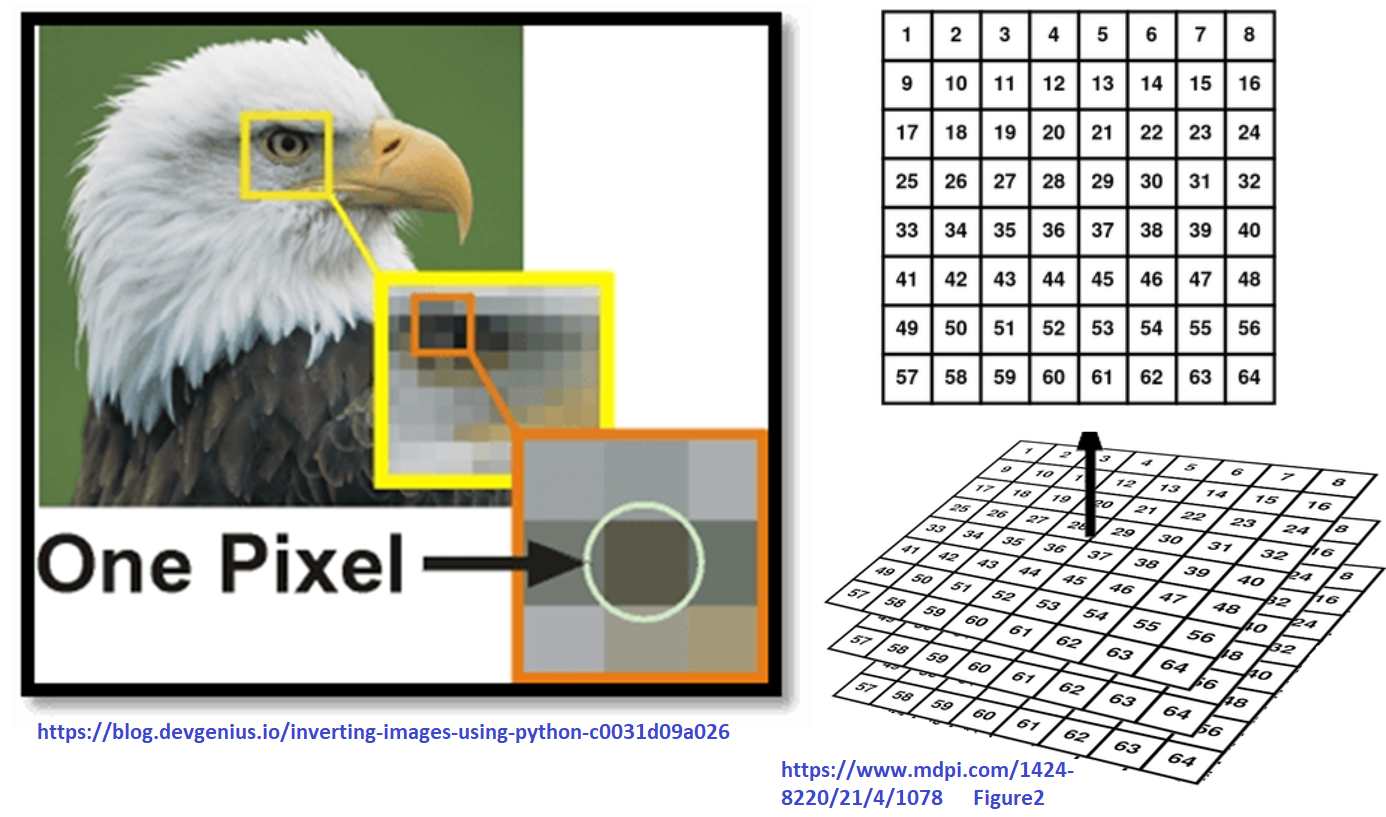

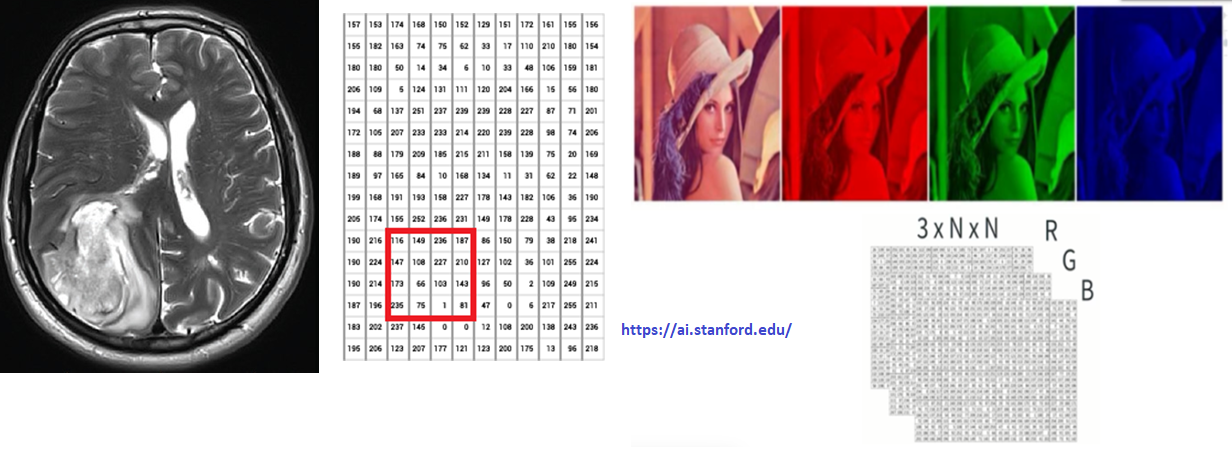

#Image Loading and Displaying

In [ ]:
path = '/content/drive/MyDrive/Amanpour/Data/JPG_PNG/Image1.jpg'

##JPG, PNG

###Keras

In [ ]:
from keras.utils import load_img

image = load_img(path, color_mode="rgb")

print(image.__class__)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
from keras.utils import img_to_array

image1 = img_to_array(image)

print(image1.shape)
print(image1.__class__)
print(image1.dtype)
print('max:', image1.max())
print('min:', image1.min())

(1280, 1280, 3)
<class 'numpy.ndarray'>
float32
max: 255.0
min: 0.0


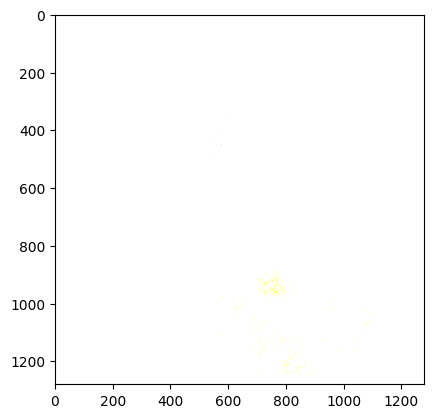

In [ ]:
import matplotlib.pyplot as plt

plt.imshow( image1 )

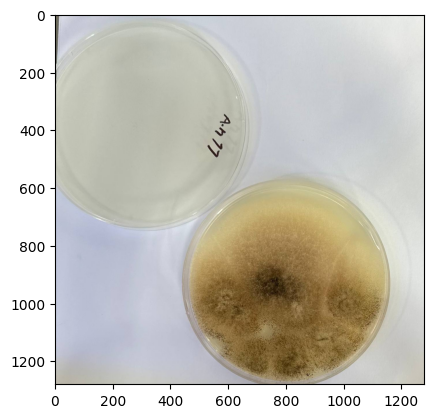

In [ ]:
import matplotlib.pyplot as plt

plt.imshow( image1 / image1.max() )

###PyTorch

In [ ]:
from torchvision.io import read_image

image = read_image(path)

print(image.__class__)
print(image.shape)
print(image.dtype)
print('max:', image.max())
print('min:', image.min())

<class 'torch.Tensor'>
torch.Size([3, 1280, 1280])
torch.uint8
max: tensor(255, dtype=torch.uint8)
min: tensor(0, dtype=torch.uint8)


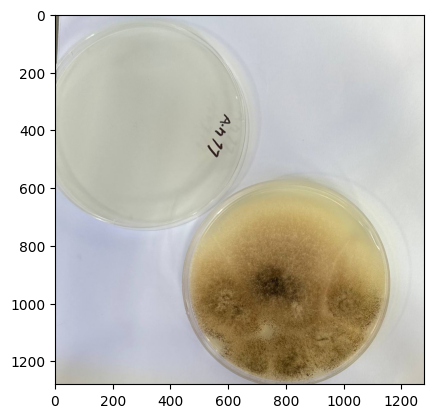

In [ ]:
import matplotlib.pyplot as plt

image1 = image.permute(1, 2, 0).numpy()

plt.imshow( image1 )

###OpenCV

In [ ]:
import cv2
image1 = cv2.imread( path )
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

print(image1.shape)
print(image1.__class__)
print(image1.dtype)
print('max: ', image1.max())
print('min: ',image1.min())

(1280, 1280, 3)
<class 'numpy.ndarray'>
uint8
max:  255
min:  0


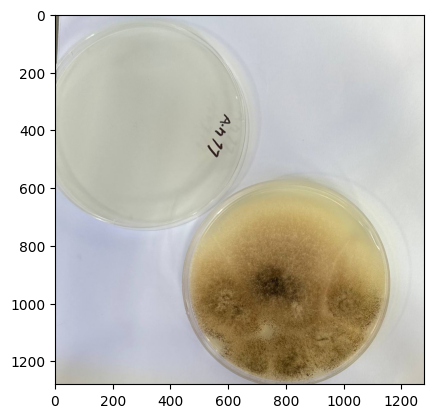

In [ ]:
import matplotlib.pyplot as plt

plt.imshow( image1 )

Text(0.5, 1.0, 'Blue')

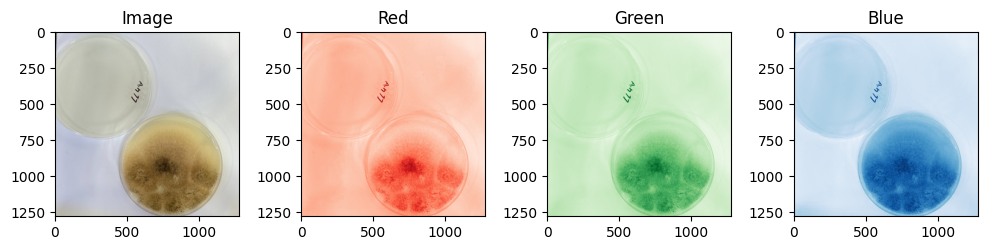

In [ ]:
R_channel = image1[:, :, 0]
G_channel = image1[:, :, 1]
B_channel = image1[:, :, 2]


import matplotlib.pyplot as plt

row, col = 1, 4
fig, axs = plt.subplots(row, col, figsize=(10, 10))
fig.tight_layout()  # Adjust the padding between and around subplots

axs[0].imshow( image1 )
axs[0].set_title('Image')

# https://matplotlib.org/stable/users/explain/colors/colormaps.html
axs[1].imshow(R_channel, cmap='Reds_r')
axs[1].set_title('Red')

axs[2].imshow(G_channel, cmap='Greens_r')
axs[2].set_title('Green')

axs[3].imshow(B_channel, cmap='Blues_r')
axs[3].set_title('Blue')

#Convolutional Layer

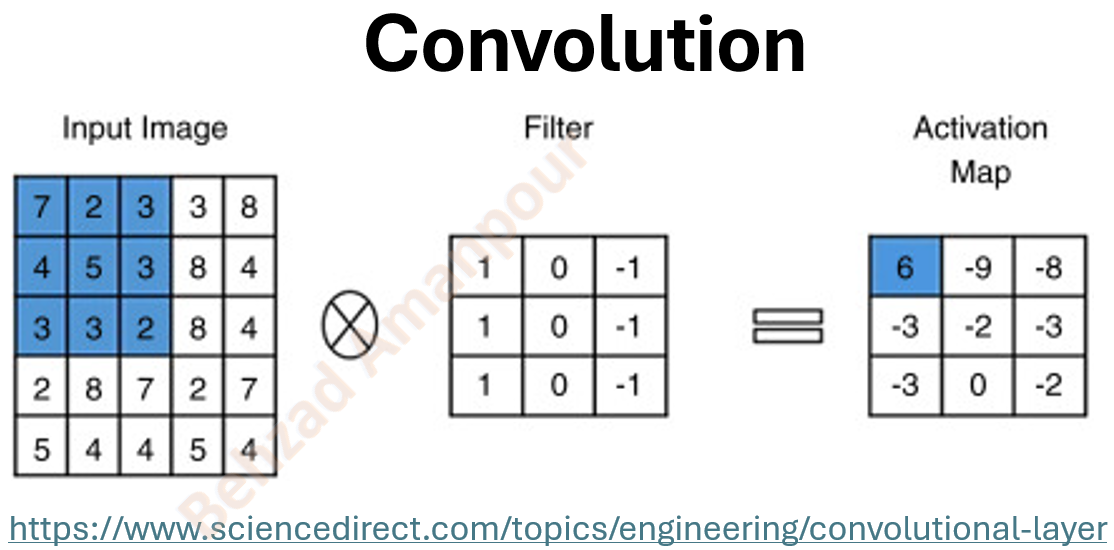

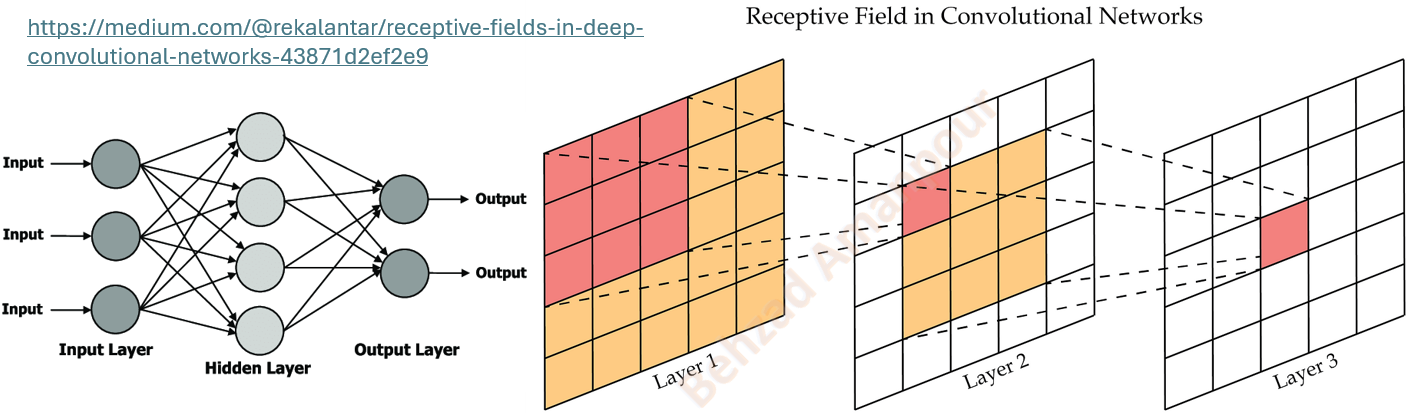

##PyTorch

In [ ]:
import torch
import torch.nn as nn

layer = nn.Conv2d(in_channels=3,
                  out_channels=4, # Number of kernels ( feature maps )
                  kernel_size=3,
                  # stride = 1,
                  # padding = 0,
                  )

In [ ]:
from torchvision.io import read_image

image = read_image(path)

image = image.float()

In [ ]:
print(image.shape)

image_batch = image.unsqueeze(0)

print(image_batch.shape)


torch.Size([3, 1280, 1280])
torch.Size([1, 3, 1280, 1280])


In [ ]:
img_conv = layer(image_batch)

print(img_conv.shape)

torch.Size([1, 4, 1278, 1278])


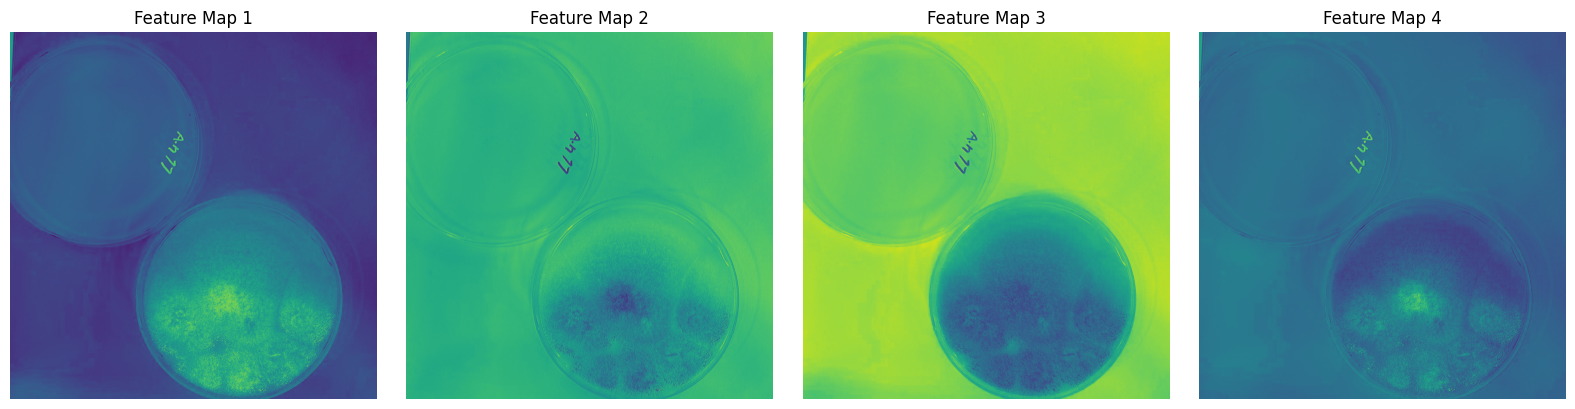

In [ ]:
import matplotlib.pyplot as plt

feature_maps = img_conv[0].detach()

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    fm = feature_maps[i]
    plt.imshow(fm / fm.max())  # normalize for visibility
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

##Keras

In [ ]:
from keras.layers import Conv2D

layer = Conv2D(filters=1,
               kernel_size=(3, 3))

In [ ]:
print( image1.shape )

image2 = image1[None, ...]
# image2 = np.expand_dims(image1, axis=0)
# image2 = tf.expand_dims(image1, axis=0)

print( image2.shape )

(1280, 1280, 3)
(1, 1280, 1280, 3)


In [ ]:
img_conv = layer( image2 )

print( img_conv.shape )
print(img_conv.__class__)
print(img_conv.dtype)
# print('max:', img_conv.max())
# print('min:', img_conv.min())

(1, 1278, 1278, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'float32'>


In [ ]:
weights, biases = layer.get_weights()

print("Weights shape:", weights.shape)

Weights shape: (3, 3, 3, 1)


In [ ]:
feature_map = img_conv[0].numpy()

print(feature_map.shape)
print(feature_map.__class__)
print(feature_map.dtype)
print('max:', feature_map.max())
print('min:', feature_map.min())

(1278, 1278, 1)
<class 'numpy.ndarray'>
float32
max: 211.26874
min: -43.21575


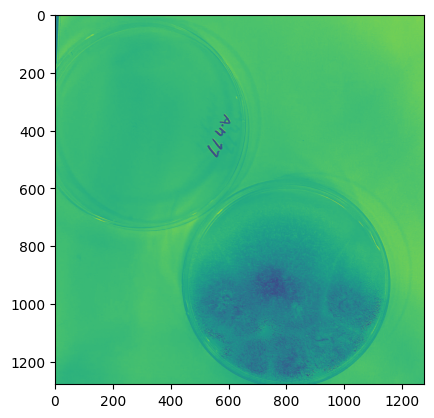

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(feature_map / feature_map.max() )

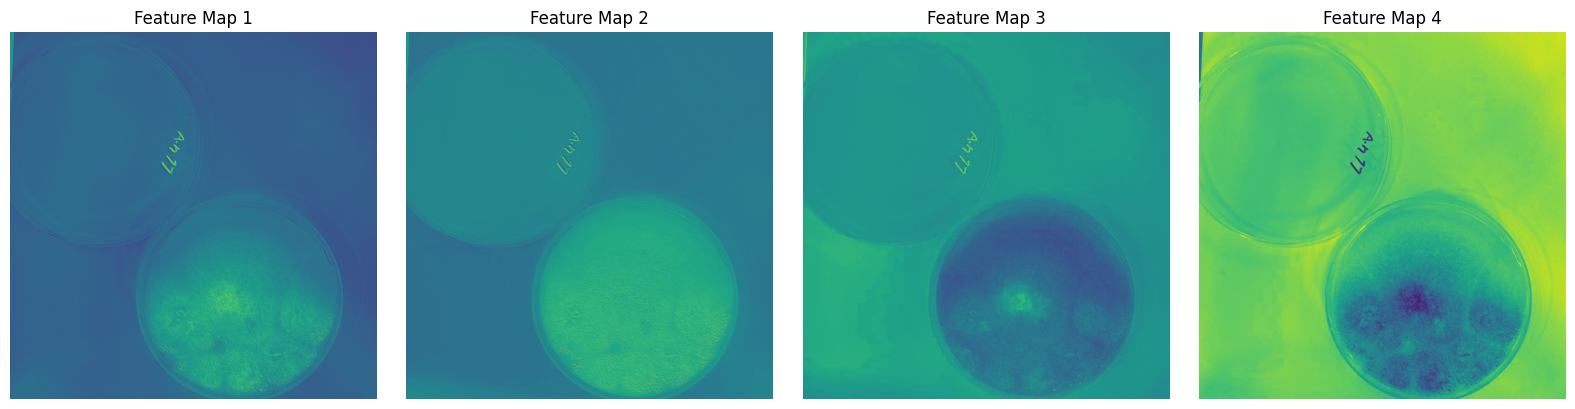

In [ ]:
from keras.layers import Conv2D
import matplotlib.pyplot as plt

layer = Conv2D(filters=4,
               kernel_size=(3, 3))

img_conv = layer( image2 )

feature_maps = img_conv[0].numpy()

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    fm = feature_maps[:, :, i]
    plt.imshow(fm / fm.max())  # normalize for visibility
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')
plt.tight_layout()

#Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def MBConv(x, expansion=6, out_channels=32):
    input_channels = x.shape[-1]
    expanded = input_channels * expansion

    # 1×1 expand
    x = layers.Conv2D(expanded, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # 3×3 depthwise
    x = layers.DepthwiseConv2D(3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # 1×1 project
    x = layers.Conv2D(out_channels, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    return x

##Load Image

In [ ]:
from keras.utils import load_img, img_to_array

path = '/content/drive/MyDrive/Courses/Private_Courses/#Data/Projects/DL_Classification_Chest_Xray/train/NORMAL/IM-0115-0001.jpeg'

img_gray = load_img(
    path,
    color_mode = "grayscale",
    )
img_gray = img_to_array( img_gray ) # Converts a PIL Image instance to a NumPy array


img_rgb = load_img(
    path,
    color_mode = "rgb",
    )
img_rgb = img_to_array( img_rgb ) # Converts a PIL Image instance to a NumPy array

In [ ]:
print(img_gray.shape)
print(img_gray.__class__)
print(img_gray.dtype)
print('max: ', img_gray.max())
print('min: ',img_gray.min())
print('=============================')
print(img_rgb.shape)
print(img_rgb.__class__)
print(img_rgb.dtype)
print('max: ', img_rgb.max())
print('min: ',img_rgb.min())

(1858, 2090, 1)
<class 'numpy.ndarray'>
float32
max:  255.0
min:  0.0
(1858, 2090, 3)
<class 'numpy.ndarray'>
float32
max:  255.0
min:  0.0


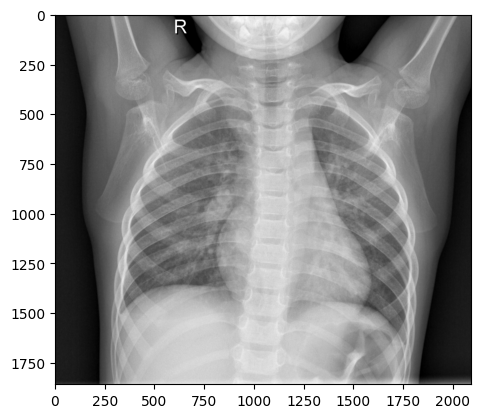

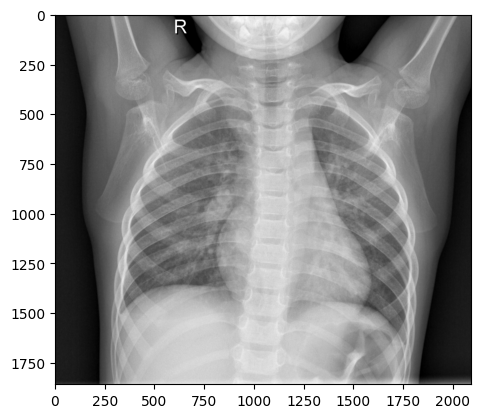

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow( img_gray, cmap='gray' )
plt.show()
plt.imshow( np.uint8(img_rgb) )
plt.show()

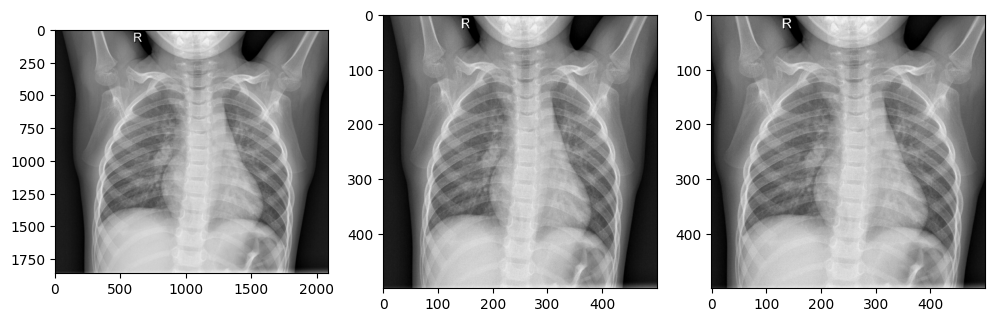

In [ ]:
img1 = load_img(
    path,
    color_mode = "grayscale",
    )

img2 = load_img(
    path,
    color_mode = "grayscale",
    target_size = (500, 500),
    keep_aspect_ratio=False
    )

img3 = load_img(
    path,
    color_mode = "grayscale",
    target_size = (500, 500),
    keep_aspect_ratio=True
    )

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')

In [ ]:
import numpy as np

img_gray = np.expand_dims(img_gray, axis=0)

print(img_gray.shape)

(1, 1858, 2090, 1)


##Pooling Layer

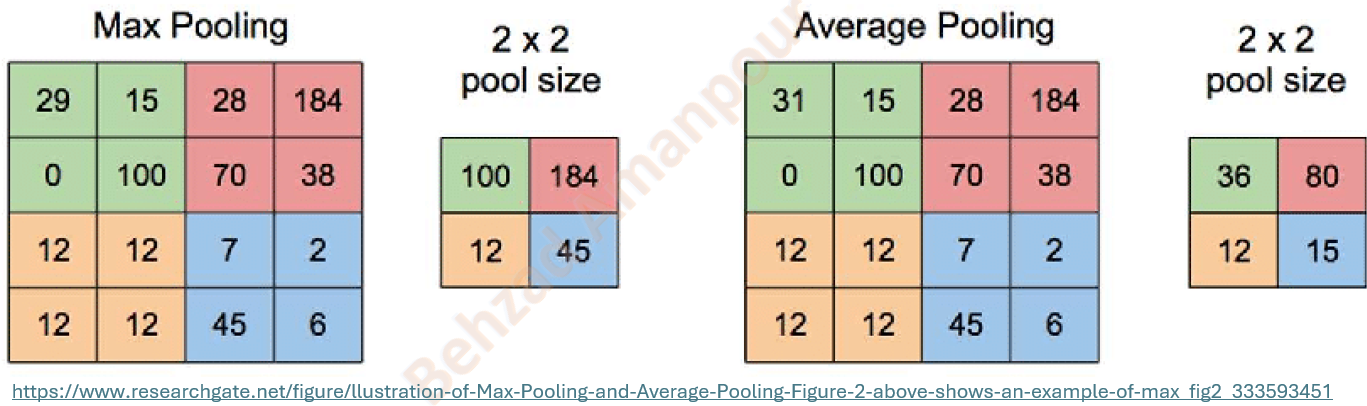

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

layer = MaxPooling2D((2, 2))

img_pool = layer( img_gray )

print( img_gray.shape )
print( img_pool.shape )

(1, 1858, 2090, 1)
(1, 929, 1045, 1)


##Flatten Layer

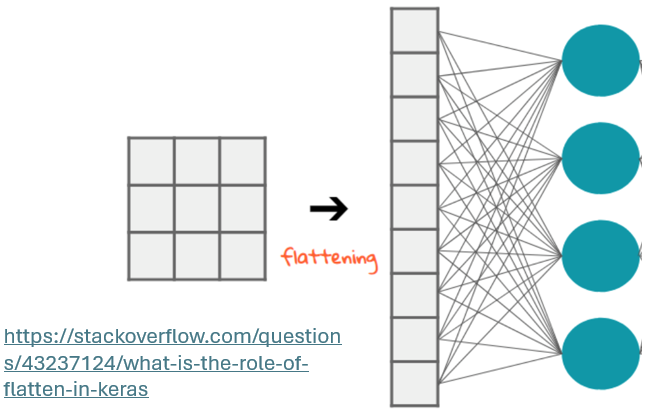

In [ ]:
from keras.layers import Flatten

layer = Flatten()

img_Flat = layer( img_gray )

print( img_gray.shape )
print( img_Flat.shape )

(1, 1858, 2090, 1)
(1, 3883220)


##Build CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Input layer that accepts images with different sizes
model.add(Input(shape=(500, 500, 1)))  # Assuming 3 color channels (RGB)

# First Conv2D layer with 16 filters
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer with 8 filters
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv2D layer with 4 filters
model.add(Conv2D(filters=4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Dense layer
model.add(Dense(units=64, activation='relu'))  # You can adjust the number of units as needed

# Output layer with a single neuron and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

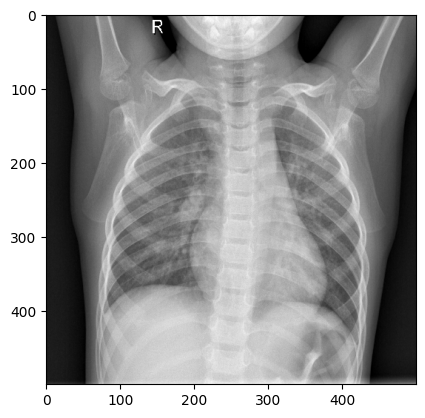

In [ ]:
from keras.utils import load_img, img_to_array

path = '/content/drive/MyDrive/Courses/Private_Courses/#Data/Projects/DL_Classification_Chest_Xray/train/NORMAL/IM-0115-0001.jpeg'

img = load_img(
    path,
    color_mode = "grayscale",  # "grayscale" "rgb"
    target_size = (500, 500), # None
    keep_aspect_ratio=False
    )
img = img_to_array( img )

import numpy as np
import matplotlib.pyplot as plt
plt.imshow( np.uint8(img), cmap='gray' )

import numpy as np
img = np.expand_dims(img, axis=0)

In [ ]:
model.predict( img )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[0.41542098]], dtype=float32)